<a href="https://colab.research.google.com/github/TonyNewness/Product-Recommendation/blob/main/Copy_of_Main_Group_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install implicit

In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from implicit.als import AlternatingLeastSquares
from google.colab import files
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
# drive.mount ('/content/drive')

In [3]:
data= pd.read_csv('/content/my_dataframe.csv')

In [4]:
data.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Name,Age,Gender,Churn,Item Purchased
0,44605,3/5/2023 21:30,177,0,2427,PayPal,John Rivera,31,Female,0,Blouse
1,44605,16/05/2021 13:57,174,2,2448,PayPal,John Rivera,31,Female,0,Sweater
2,44605,13/07/2020 06:16,413,0,2345,Credit Card,John Rivera,31,Female,0,Jeans
3,44605,17/01/2023 13:14,396,3,937,Cash,John Rivera,31,Female,0,Sandals
4,44605,1/5/2021 11:29,259,3,2598,PayPal,John Rivera,31,Female,0,Blouse


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            500000 non-null  int64 
 1   Purchase Date          500000 non-null  object
 2   Product Price          500000 non-null  int64 
 3   Quantity               500000 non-null  int64 
 4   Total Purchase Amount  500000 non-null  int64 
 5   Payment Method         500000 non-null  object
 6   Customer Name          500000 non-null  object
 7   Age                    500000 non-null  int64 
 8   Gender                 500000 non-null  object
 9   Churn                  500000 non-null  int64 
 10  Item Purchased         500000 non-null  object
dtypes: int64(6), object(5)
memory usage: 42.0+ MB


In [6]:
data.drop(columns=['Churn','Customer Name'],axis=1, inplace=True)
data

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Payment Method,Age,Gender,Item Purchased
0,44605,3/5/2023 21:30,177,0,2427,PayPal,31,Female,Blouse
1,44605,16/05/2021 13:57,174,2,2448,PayPal,31,Female,Sweater
2,44605,13/07/2020 06:16,413,0,2345,Credit Card,31,Female,Jeans
3,44605,17/01/2023 13:14,396,3,937,Cash,31,Female,Sandals
4,44605,1/5/2021 11:29,259,3,2598,PayPal,31,Female,Blouse
...,...,...,...,...,...,...,...,...,...
499995,33308,8/10/2023 13:39,279,1,2187,PayPal,55,Male,Sneakers
499996,48835,11/23/2021 1:30,27,0,3615,Credit Card,42,Female,Dress
499997,21019,7/2/2020 14:04,17,5,2466,Cash,41,Male,Belt
499998,49234,12/30/2020 2:02,398,2,3668,Crypto,34,Female,Boots


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            500000 non-null  int64 
 1   Purchase Date          500000 non-null  object
 2   Product Price          500000 non-null  int64 
 3   Quantity               500000 non-null  int64 
 4   Total Purchase Amount  500000 non-null  int64 
 5   Payment Method         500000 non-null  object
 6   Age                    500000 non-null  int64 
 7   Gender                 500000 non-null  object
 8   Item Purchased         500000 non-null  object
dtypes: int64(5), object(4)
memory usage: 34.3+ MB


**Number of products that was not returened?**

In [8]:
500000 - 405022

94978

**Number of Items sold in the store?**

In [9]:
data['Item Purchased'].nunique()

25

In [10]:
data['Customer ID'].nunique()

49998

In [11]:
# Function to find the total number of each product sold
def most_Sold_Product(data):
  product_Sum = {} # declared empty dictionary to store the total sum of each product
  # The below checks if a product is in the dataframe column 'Item Purchased' exists and finds all it's occurrences in the 'Quantity' column and sum them up
  for name_Of_Product in data['Item Purchased'].unique(): # for every unique product in the column Item Purchased
    total_prod = data[data['Item Purchased'] == name_Of_Product]['Quantity'].sum() # Filter based on the product name and sum all the quantities (in the Quantity column) of the filtered product.
    product_Sum[name_Of_Product] = total_prod #assigns the sum of each product to the empty dictionary created earlier

  #sort the products based on most sold to the least sold
  sorted_product_Sum = sorted(product_Sum.items(), key=lambda x: x[1], reverse=True)

  # Print sum total of products on the dataset
  for name_Of_Product, total_prod in sorted_product_Sum:
    print('Total', name_Of_Product, 'sold:', total_prod)
  return sorted_product_Sum
# Call the the function to print totals of each sold product from most sold to least sold
sorted_product_Sum = most_Sold_Product(data)

Total Jewelry sold: 57142
Total Pants sold: 56817
Total Blouse sold: 56428
Total Shirt sold: 56202
Total Dress sold: 55541
Total Sweater sold: 54494
Total Jacket sold: 54258
Total Coat sold: 54020
Total Belt sold: 53816
Total Sunglasses sold: 53443
Total Sandals sold: 53210
Total Socks sold: 52799
Total Skirt sold: 52697
Total Scarf sold: 52545
Total Shorts sold: 52286
Total Hat sold: 51293
Total Handbag sold: 50855
Total Hoodie sold: 50246
Total Shoes sold: 49979
Total T-shirt sold: 48930
Total Sneakers sold: 48520
Total Backpack sold: 47625
Total Boots sold: 47603
Total Gloves sold: 46630
Total Jeans sold: 41334


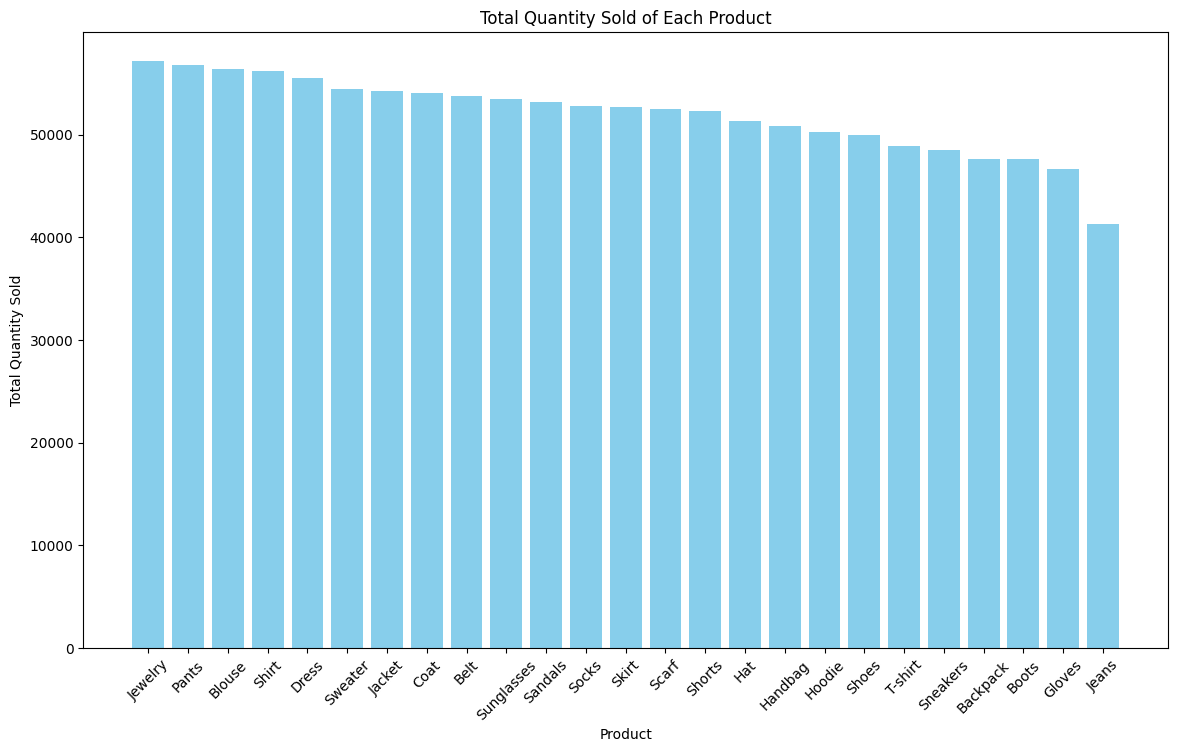

In [12]:
# Extract product names and total quantities
product_names = [item[0] for item in sorted_product_Sum]
total_quantities = [item[1] for item in sorted_product_Sum]

# Plotting the bar chart
plt.figure(figsize=(14, 8))
plt.bar(product_names, total_quantities, color='skyblue')

# Adding titles and labels
plt.title('Total Quantity Sold of Each Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [13]:
# Listing all unique years on the dataset
data['Purchase Date'].apply(lambda x: x.split('/')[2].split(' ')[0]).unique()

array(['2023', '2021', '2020', '2022'], dtype=object)

**How much revenue was made each year?
Sort the years by product price.**

In [14]:
# Total purchase by Year
By_Year = data.groupby(data['Purchase Date'].apply(lambda x: x.split('/')[2].split(' ')[0]))['Total Purchase Amount'].sum()
By_Year

Purchase Date
2020    370153678
2021    366515884
2022    367270229
2023    258749191
Name: Total Purchase Amount, dtype: int64

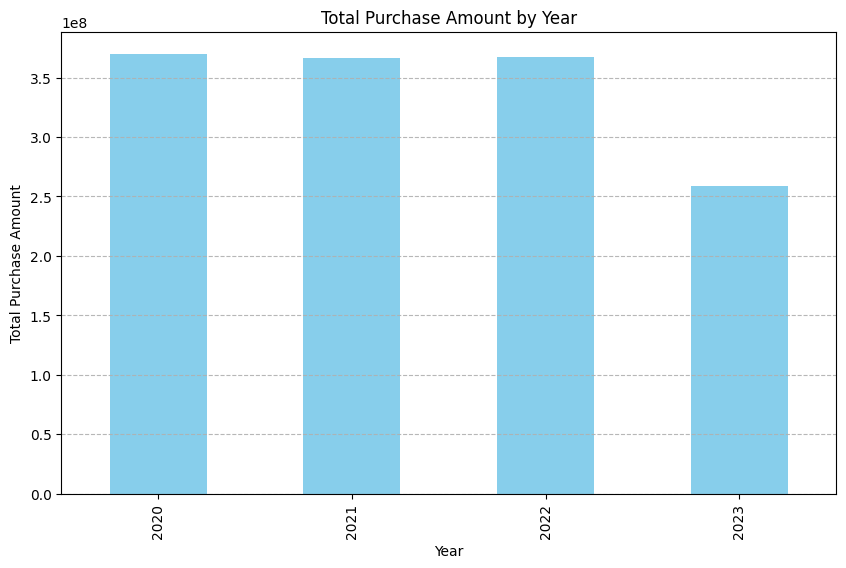

In [15]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
By_Year.plot(kind='bar', color='skyblue')

# Titles and labels
plt.title('Total Purchase Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Purchase Amount')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Show the plot
plt.show()

In [16]:
# Total Purchase for the 4 years
By_Year.sum()

1362688982

**Average Price spent per age group**

In [17]:
# Average of Total purchase by Age
Ave_purchase_by_age = data.groupby('Age')['Total Purchase Amount'].mean().sort_values(ascending= False).head(10)

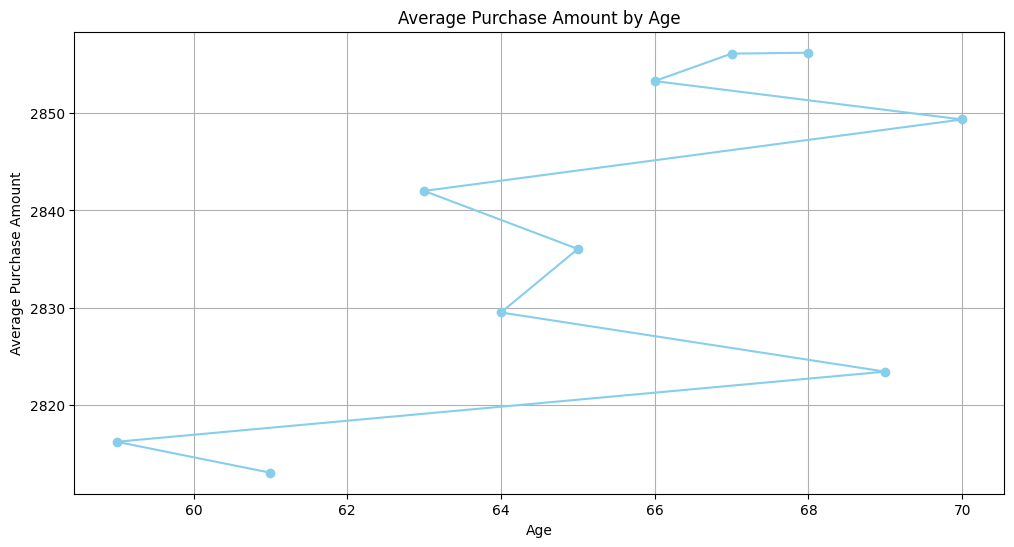

In [18]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(Ave_purchase_by_age.index, Ave_purchase_by_age.values, marker='o', linestyle='-', color='skyblue')

# Titles and labels
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()

<Figure size 1400x800 with 0 Axes>

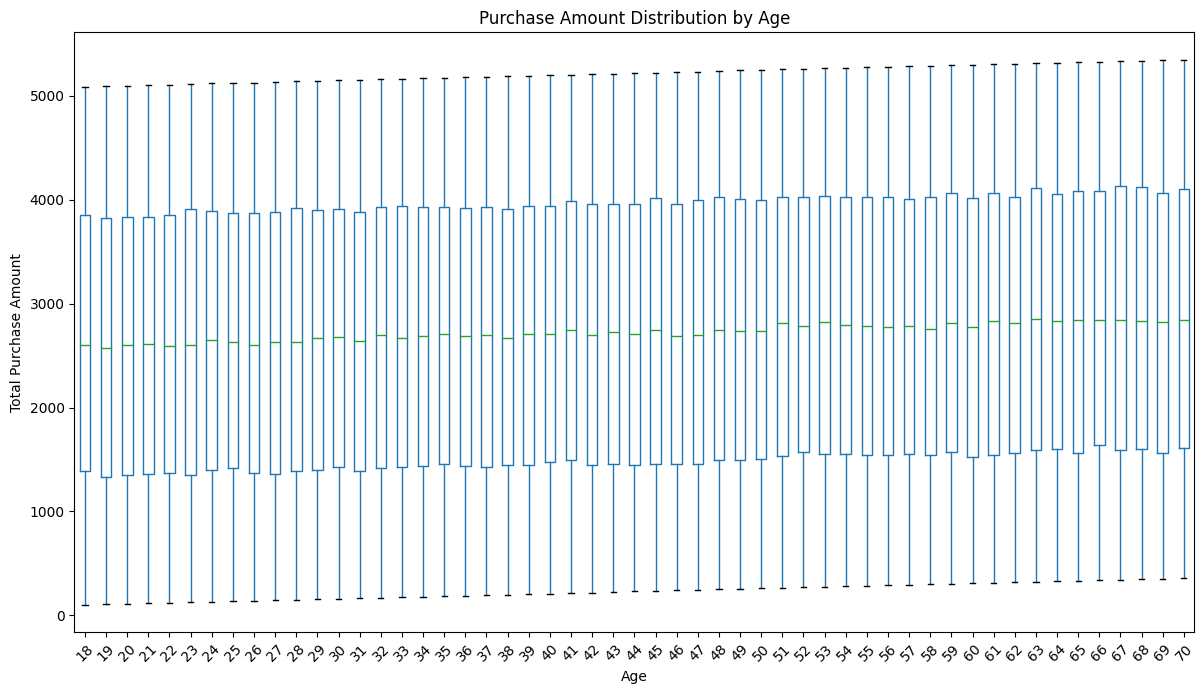

In [19]:
# Assuming 'data' is your dataframe and it contains 'Age' and 'Total Purchase Amount' columns

# Plotting the box plot
plt.figure(figsize=(14, 8))
data.boxplot(column='Total Purchase Amount', by='Age', grid=False, figsize=(14, 8))

# Titles and labels
plt.title('Purchase Amount Distribution by Age')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount')

# Rotating the x-axis labels because of many age groups for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [20]:
# Average of Total purchase by Age
data.groupby('Age')['Total Purchase Amount'].mean().sort_values(ascending= False).head(20)

Age
68    2856.231787
67    2856.138489
66    2853.314596
70    2849.363342
63    2842.010849
65    2836.041856
64    2829.500776
69    2823.413374
59    2816.196087
61    2813.011063
62    2804.792101
53    2796.408931
51    2786.932720
57    2786.480237
56    2786.268700
52    2784.542192
54    2783.862047
55    2783.624254
58    2783.203951
60    2781.658302
Name: Total Purchase Amount, dtype: float64

**Total expenses by age**

In [21]:
# Total purchase by Age
data.groupby('Age')['Total Purchase Amount'].sum().sort_values(ascending= False).head(10)

Age
64    27330148
70    27313997
68    27208464
51    26966361
67    26810572
69    26726431
63    26720586
61    26698288
56    26670164
43    26550621
Name: Total Purchase Amount, dtype: int64

In [22]:
# Finding Total purchase per gender
by_gender = data.groupby('Gender')['Total Purchase Amount'].sum().sort_values(ascending= False)
by_gender

Gender
Male      681667105
Female    681021877
Name: Total Purchase Amount, dtype: int64

In [23]:
# Finding the Average expenses by gender
print('================================================''\n Average Total purchase amount between the 2 gender''\n==============================================')
Avg_by_gender = data.groupby('Gender')['Total Purchase Amount'].mean().sort_values(ascending= False)
print(Avg_by_gender)
print('================================================''\n Average Difference between the 2 gender''\n==============================================')
Avg_by_gender.diff() # The difference of the Averages

 Average Total purchase amount between the 2 gender
Gender
Male      2725.403833
Female    2725.352071
Name: Total Purchase Amount, dtype: float64
 Average Difference between the 2 gender


Gender
Male           NaN
Female   -0.051761
Name: Total Purchase Amount, dtype: float64

In [24]:
by_gender.sum() # Sum of the total expenses of both gender

1362688982

In [25]:
by_gender.diff() # Difference in the total expenses of both gender

Gender
Male           NaN
Female   -645228.0
Name: Total Purchase Amount, dtype: float64

In [26]:
# Average age for both genders
data.groupby('Gender')['Age'].mean()

Gender
Female    43.874930
Male      43.863879
Name: Age, dtype: float64

To develope a recommendation model without explicit customer ratings, we would use the **Matrix Factorization** techniques **Alternating Least Squares (ALS)**. This is because our data lacks direct feedback, we rely on implicit signals such as product quantities purchased. ALS helps uncover such implicit feedbacks patterns in customer interactions with products.

In [27]:
data.drop(columns=['Purchase Date','Product Price','Total Purchase Amount','Payment Method','Age','Gender'],axis=1, inplace=True)
data

,Customer ID,Quantity,Item Purchased
0,44605,0,Blouse
1,44605,2,Sweater
2,44605,0,Jeans
3,44605,3,Sandals
4,44605,3,Blouse
...,...,...,...
499995,33308,1,Sneakers
499996,48835,0,Dress
499997,21019,5,Belt
499998,49234,2,Boots


In [28]:
#Mapping Customer ID and Item Purcahsed to unique indices
data['customer_ids'] = data['Customer ID'].astype('category').cat.codes
data['item_ids'] = data['Item Purchased'].astype('category').cat.codes

In [29]:
data.head(20)

,Customer ID,Quantity,Item Purchased,customer_ids,item_ids
0,44605,0,Blouse,44602,2
1,44605,2,Sweater,44602,23
2,44605,0,Jeans,44602,11
3,44605,3,Sandals,44602,14
4,44605,3,Blouse,44602,2
5,13738,2,Sneakers,13736,20
6,13738,1,Shirt,13736,16
7,13738,4,Shorts,13736,18
8,13738,2,Coat,13736,4
9,13738,4,Handbag,13736,7


In [30]:
pivot = pd.pivot_table(data, values= 'Quantity', index= 'customer_ids', columns= 'Item Purchased', aggfunc= 'sum', fill_value= 0)
pivot

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
customer_ids,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,4,5,0,0,5,0,0,...,0,0,0,0,0,0,0,5,0,0
1,0,0,0,5,0,0,0,3,0,0,...,0,0,0,4,0,2,1,0,0,0
2,0,0,5,0,0,1,0,3,0,2,...,5,0,4,2,0,0,0,0,3,1
3,0,0,0,0,0,0,4,0,0,0,...,2,1,0,0,2,0,3,0,0,2
4,0,0,0,7,1,5,0,1,3,0,...,0,9,0,0,5,3,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,2,5,3,0,0,0,3,0,1,0,...,0,1,5,2,7,3,0,0,0,0
49994,0,0,0,0,0,0,1,0,4,2,...,0,0,5,0,3,0,2,3,0,0
49995,2,0,0,0,0,0,3,3,2,0,...,0,0,0,0,1,4,7,5,2,1


In [31]:
# Converting to sparse matrix format for efficient computation, as sparse matrix holds only none zero values and as we can see above not all customer purchased all products hence we have a lot of zeros.
csr = csr_matrix(pivot) # we convert to csr format because ALS model only works with csr data
print(type(csr))

<class 'scipy.sparse._csr.csr_matrix'>


**Model creation and Training**

In [32]:
# Apply matrix factorization (ALS)
als_model = AlternatingLeastSquares(factors=10, regularization=0.1, iterations=20) # Initialise the ALS model
als_model.fit(csr)  # Train the ALS model with the data.

/usr/local/lib/python3.10/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

**TESTING THE MODEL**

In [33]:
# def recommend_products(customer_ids):
#     if customer_ids not in pivot.index:
#         return []  # Customer not found in the pivot table

#     customer_index = list(pivot.index).index(customer_ids)

#     # Extract the row corresponding to the customer from the CSR matrix
#     user_interactions = csr[customer_index]

#     # Reshape user_interactions to ensure it's a 2D array with one row
#     user_interactions = user_interactions.reshape(1, -1)

#     # Get recommendations from the ALS model
#     raw_recommendations = als_model.recommend(customer_index, user_interactions, N=4)

#     # Print the raw recommendations for debugging
#     print("Raw recommendations:", raw_recommendations)

#     # Extract item indices from recommendations correctly
#     recommended_indices = list(raw_recommendations[0])

#     # Print the recommended indices for debugging
#     print("Recommended indices:", recommended_indices)

#     # Map indices to product names
#     recommended_products = [pivot.columns[index] for index in recommended_indices]

#     # Print the final recommended products for debugging
#     print("Recommended products:", recommended_products)

#     return recommended_products

# # Example usage:
# recommendations = recommend_products(44602)
# print("Final recommendations:", recommendations)


In [34]:
def recommend_products(customer_ids):
    if customer_ids not in pivot.index:
        return []  # Customer not found in the pivot table

    customer_index = list(pivot.index).index(customer_ids)

    # Extract the row corresponding to the customer from the CSR matrix
    user_interactions = csr[customer_index]

    # Reshape user_interactions to ensure it's a 2D array with one row
    user_interactions = user_interactions.reshape(1, -1)

    # Get recommendations from the ALS model
    raw_recommendations = als_model.recommend(customer_index, user_interactions, N=4)

    # Print the raw recommendations for debugging
    print("Raw recommendations:", raw_recommendations)

    # Extract item indices from recommendations correctly
    recommended_indices = list(raw_recommendations[0])

    # Print the recommended indices for debugging
    print("Recommended indices:", recommended_indices)

    # Map indices to product names
    recommended_products = [pivot.columns[index] for index in recommended_indices]

    # Print the final recommended products for debugging
    print("Recommended products:", recommended_products)

    return recommended_products

# Example usage:
recommendations = recommend_products(44602)
print("Final recommendations:", recommendations)


Raw recommendations: (array([16,  0,  3,  6], dtype=int32), array([0.5239276 , 0.51518697, 0.43873966, 0.31901276], dtype=float32))
Recommended indices: [16, 0, 3, 6]
Recommended products: ['Shirt', 'Backpack', 'Boots', 'Gloves']
Final recommendations: ['Shirt', 'Backpack', 'Boots', 'Gloves']


**EVALUATING THE MODEL**